# 🐱‍💻DATA SCIENCE CHALLENGE SCL WEEK 4 🐱‍💻
### *Predicting card fraud*

<img src='https://www.eastwestbank.com/ReachFurther/NewsArticleStore/519/Online-credit-card-fraud1.jpg'>

# 🔍BACKGROUND
The datasets contains transactions made by credit cards in September 2013 by european cardholders. It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.

# 🔍TASK
Create a predictive algorithm (Machine Learning, NOT ANN) to predict if a transaction is fraud (class 1) or not (class 2).

# 🔍DATASETS
Columns:

* 0 -> Time, numeric variable
* 1-28 -> Predictive numeric features
* 29 -> Amount, numeric variable
* 30 -> Class, this is the target. It is a nominal variable with just 2 unique values (0 and 1)

# 🔍Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc


from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# 🔍Preliminar Analysis of Data
------------------

In [2]:
df = pd.read_csv('train.csv')
X_test = pd.read_csv('X_test.csv')

In [3]:
df.head(3)

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,3295,26261,-0.324180,-0.689664,1.248250,-3.099011,-0.492221,-0.514122,-0.364238,0.093091,...,-0.106775,-0.092716,0.112490,-0.517835,-0.732661,-0.659781,0.173737,0.178140,20.0,'0'
1,7239,77699,1.058979,-0.635378,1.075733,0.728828,-1.311240,-0.193179,-0.625044,-0.014119,...,-0.118993,0.199730,-0.041309,0.618249,0.386204,-0.237576,0.086713,0.052510,90.0,'0'
2,4803,4250,1.015982,0.254365,0.620039,1.494604,0.470163,1.255922,-0.226799,0.295975,...,-0.133388,0.273829,0.083820,-0.666219,0.385798,-0.274221,0.075576,0.002012,1.0,'0'


As we can see, we have 30 different features in our dataset plus the target.

In [5]:
# Droping unnecesary columns

df = df.drop(columns=['Unnamed: 0'], axis=1)

In [6]:
df.Class.value_counts()

'0'    7052
'1'     318
Name: Class, dtype: int64

In [7]:
df['Class'] = df.Class.apply(lambda x: 0 if x=="'0'" else 1)

In [8]:
df.Class.value_counts()

0    7052
1     318
Name: Class, dtype: int64

In [9]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,26261,-0.324180,-0.689664,1.248250,-3.099011,-0.492221,-0.514122,-0.364238,0.093091,-1.850716,...,-0.106775,-0.092716,0.112490,-0.517835,-0.732661,-0.659781,0.173737,0.178140,20.0,0
1,77699,1.058979,-0.635378,1.075733,0.728828,-1.311240,-0.193179,-0.625044,-0.014119,-0.648844,...,-0.118993,0.199730,-0.041309,0.618249,0.386204,-0.237576,0.086713,0.052510,90.0,0
2,4250,1.015982,0.254365,0.620039,1.494604,0.470163,1.255922,-0.226799,0.295975,1.411473,...,-0.133388,0.273829,0.083820,-0.666219,0.385798,-0.274221,0.075576,0.002012,1.0,0


### Data Types and distributions

In [10]:
display(df.info(), df.describe().transpose())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7370 entries, 0 to 7369
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7370 non-null   int64  
 1   V1      7370 non-null   float64
 2   V2      7370 non-null   float64
 3   V3      7370 non-null   float64
 4   V4      7370 non-null   float64
 5   V5      7370 non-null   float64
 6   V6      7370 non-null   float64
 7   V7      7370 non-null   float64
 8   V8      7370 non-null   float64
 9   V9      7370 non-null   float64
 10  V10     7370 non-null   float64
 11  V11     7370 non-null   float64
 12  V12     7370 non-null   float64
 13  V13     7370 non-null   float64
 14  V14     7370 non-null   float64
 15  V15     7370 non-null   float64
 16  V16     7370 non-null   float64
 17  V17     7370 non-null   float64
 18  V18     7370 non-null   float64
 19  V19     7370 non-null   float64
 20  V20     7370 non-null   float64
 21  V21     7370 non-null   float64
 22  

None

,count,mean,std,min,25%,50%,75%,max
Time,7370.0,92475.074898,47276.774474,17.000000,52694.250000,84491.000000,135829.750000,172787.000000
V1,7370.0,-0.833627,2.954439,-36.802320,-1.557422,-0.653961,1.025357,2.132535
V2,7370.0,-0.024620,2.930521,-63.344698,-0.653821,0.158172,0.853543,19.167239
V3,7370.0,-0.000536,2.738342,-31.103685,-0.609843,0.540937,1.404159,3.934739
V4,7370.0,0.919625,2.308968,-5.231828,-0.736012,0.634182,2.701308,16.875344
V5,7370.0,0.050083,2.262596,-22.756016,-0.555609,0.209283,0.966751,23.589804
V6,7370.0,0.574061,1.584185,-17.118592,-0.305563,0.529454,1.368256,16.614054
V7,7370.0,-0.293337,2.603668,-37.060311,-0.733465,-0.127633,0.550989,28.239528
V8,7370.0,0.036787,2.773300,-73.216718,-0.082071,0.264951,0.595819,20.007208
V9,7370.0,-0.463867,1.310897,-11.126624,-1.128469,-0.486150,0.128096,9.099082


As we could see, our columns V1 to V28 are standarized (In fact, they have PCA applied, which first step is standarization). So, to make a comparable analysis, I would standarize our 'Amount' and 'Seconds' features too.

In [11]:
rob_scaler = RobustScaler()

In [12]:
df[['Time','Amount']] = rob_scaler.fit_transform(df[['Time','Amount']])

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,7370.0,0.096037,0.568671,-1.016100,-0.382469,0.000000e+00,0.617531,1.062073
V1,7370.0,-0.833627,2.954439,-36.802320,-1.557422,-6.539610e-01,1.025357,2.132535
V2,7370.0,-0.024620,2.930521,-63.344698,-0.653821,1.581723e-01,0.853543,19.167239
V3,7370.0,-0.000536,2.738342,-31.103685,-0.609843,5.409368e-01,1.404159,3.934739
V4,7370.0,0.919625,2.308968,-5.231828,-0.736012,6.341819e-01,2.701308,16.875344
V5,7370.0,0.050083,2.262596,-22.756016,-0.555609,2.092829e-01,0.966751,23.589804
V6,7370.0,0.574061,1.584185,-17.118592,-0.305563,5.294543e-01,1.368256,16.614054
V7,7370.0,-0.293337,2.603668,-37.060311,-0.733465,-1.276330e-01,0.550989,28.239528
V8,7370.0,0.036787,2.773300,-73.216718,-0.082071,2.649507e-01,0.595819,20.007208
V9,7370.0,-0.463867,1.310897,-11.126624,-1.128469,-4.861504e-01,0.128096,9.099082


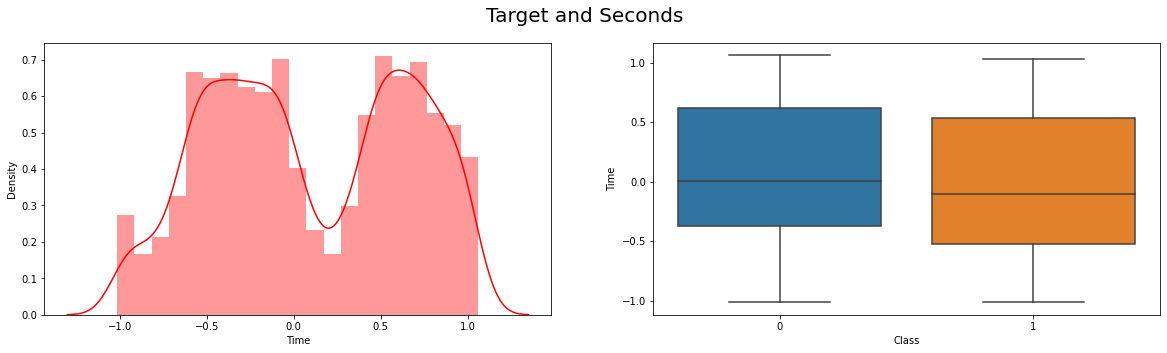

In [14]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,5))
plt.suptitle('Target and Seconds', size=20)
plt.subplot(1,2,1)
sns.distplot(df['Time'],color='r')
plt.subplot(1,2,2)
sns.boxplot(y=df['Time'], x=df['Class'])
plt.show()

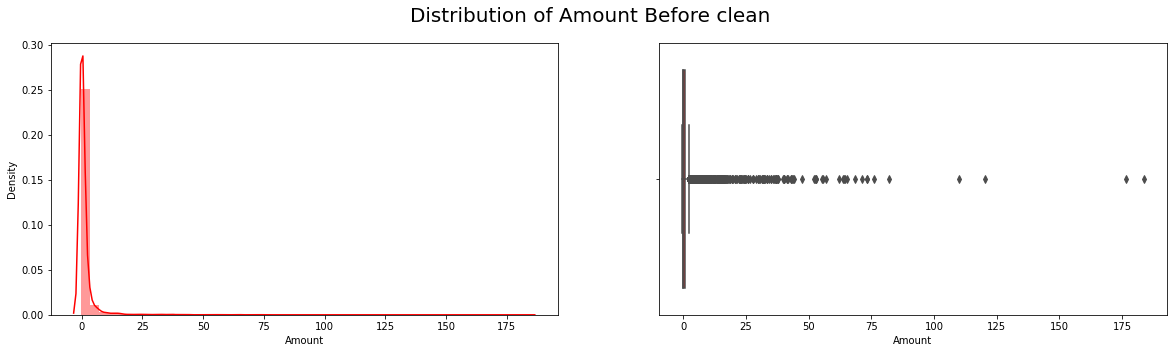

In [15]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,5))
plt.suptitle('Distribution of Amount Before clean', size=20)
plt.subplot(1,2,1)
sns.distplot(df['Amount'],color='r')
plt.subplot(1,2,2)
sns.boxplot(df['Amount'],color='r')
plt.show()

In [16]:
percentile25 = df['Amount'].quantile(0.25)
percentile75 = df['Amount'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [17]:
print('Upper Limit outliers: ',df[df['Amount'] > upper_limit].shape[0], '( ',round((df[df['Amount'] > upper_limit].shape[0]) / df.shape[0] *100,2),'% )')
print('Lower Limit outliers: ',df[df['Amount'] < lower_limit].shape[0])


Upper Limit outliers:  851 (  11.55 % )
Lower Limit outliers:  0


In [18]:
new_df = df.loc[(df['Amount'] < upper_limit) & (df['Amount'] > lower_limit)]

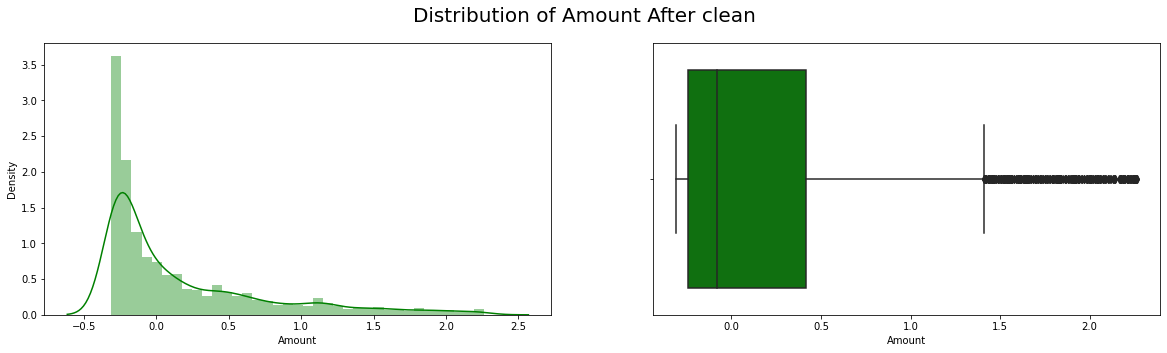

In [19]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.suptitle('Distribution of Amount After clean', size=20)
sns.distplot(new_df['Amount'],color='g')
plt.subplot(1,2,2)
sns.boxplot(new_df['Amount'],color='g')
plt.show()

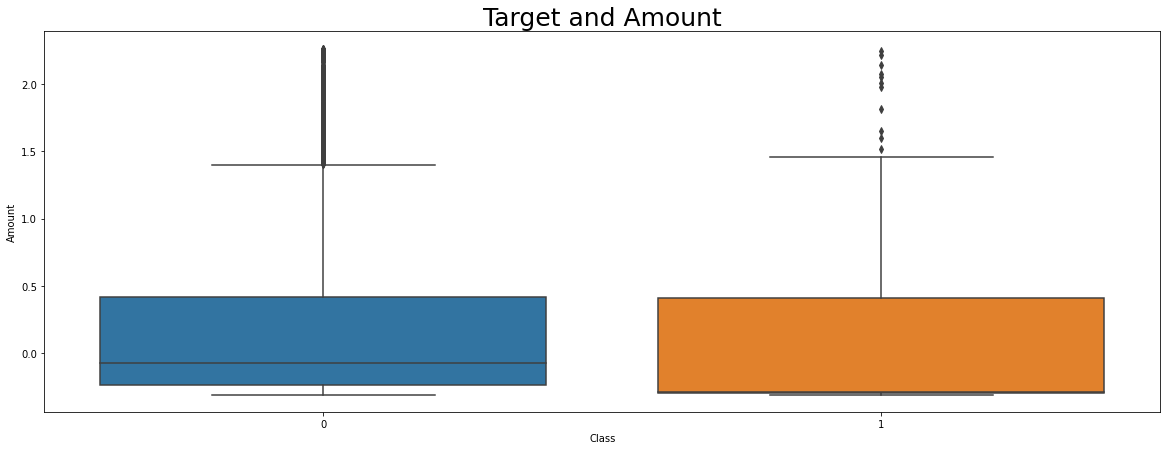

In [20]:
plt.figure(figsize=(20,7))
sns.boxplot(x='Class', y='Amount', data=new_df)
plt.title('Target and Amount', size=25);

# 🔍 Train - Validation Split

In [21]:
X_train, X_val, y_train, y_val\
                            = train_test_split(new_df.drop(['Class'], axis=1),\
                                    new_df['Class'],\
                                    stratify = new_df['Class'],\
                                    random_state=0)

In [22]:
display('X train', X_train.shape,'X Val', X_val.shape,'Y train', y_train.shape,'Y Val', y_val.shape)

'X train'

(4889, 30)

'X Val'

(1630, 30)

'Y train'

(4889,)

'Y Val'

(1630,)

# 🔍Unbalanced Classes

In [23]:
display('Fraudulent and non fraudulent observations: ',new_df.Class.value_counts(),' ',
       'Percentaje of Fraudulent and Non Fraudulent Obs', new_df.Class.value_counts()/ df.shape[0]);

'Fraudulent and non fraudulent observations: '

0    6245
1     274
Name: Class, dtype: int64

' '

'Percentaje of Fraudulent and Non Fraudulent Obs'

0    0.847354
1    0.037178
Name: Class, dtype: float64

In [24]:
from imblearn.over_sampling import RandomOverSampler

oversampler=RandomOverSampler(sampling_strategy='minority');

X_train_os,y_train_os=oversampler.fit_resample(X_train,y_train);

print('training set:')
print(y_train_os.value_counts())

print('\nval set:')
print(y_val.value_counts())

training set:
1    4684
0    4684
Name: Class, dtype: int64

val set:
0    1561
1      69
Name: Class, dtype: int64


# 🔍Model Evaluation

### Logistic Regression

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1561
           1       1.00      0.84      0.91        69

    accuracy                           0.99      1630
   macro avg       1.00      0.92      0.95      1630
weighted avg       0.99      0.99      0.99      1630

Area under ROC curve: 0.9899
Area under Precision-Recall curve: 0.9674


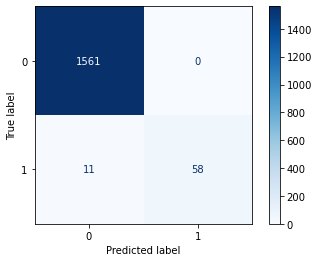

In [25]:
model_logistic=LogisticRegressionCV(scoring='f1')
    
model_logistic.fit(X_train,y_train)
y_pred=model_logistic.predict(X_val)
y_proba=model_logistic.predict_proba(X_val)
    
print(classification_report(y_val,y_pred))
    
print('Area under ROC curve:',np.round(roc_auc_score(y_val,y_proba[:,1]),4))
    
precision, recall,threshold=precision_recall_curve(y_val,y_proba[:,1]);

print('Area under Precision-Recall curve:',np.round(auc(recall,precision),4))

plot_confusion_matrix(model_logistic,X_val,y_val,cmap='Blues');

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1561
           1       0.95      0.91      0.93        69

    accuracy                           0.99      1630
   macro avg       0.98      0.96      0.97      1630
weighted avg       0.99      0.99      0.99      1630

Area under ROC curve: 0.9556
Area under Precision-Recall curve: 0.9356


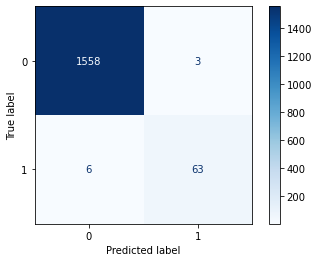

In [26]:
## Base Model

dt = DecisionTreeClassifier(random_state=1)
ab = AdaBoostClassifier(base_estimator=dt, n_estimators=500,random_state=1)

model_ab_2 = ab.fit(X_train, y_train)

y_pred_ab_2=model_ab_2.predict(X_val)
y_proba_ab_2=model_ab_2.predict_proba(X_val)
    
print(classification_report(y_val,y_pred_ab_2))
    
print('Area under ROC curve:',np.round(roc_auc_score(y_val,y_proba_ab_2[:,1]),4))
    
precision, recall,threshold=precision_recall_curve(y_val,y_proba_ab_2[:,1]);

print('Area under Precision-Recall curve:',np.round(auc(recall,precision),4))

plot_confusion_matrix(model_ab_2,X_val,y_val,cmap='Blues');

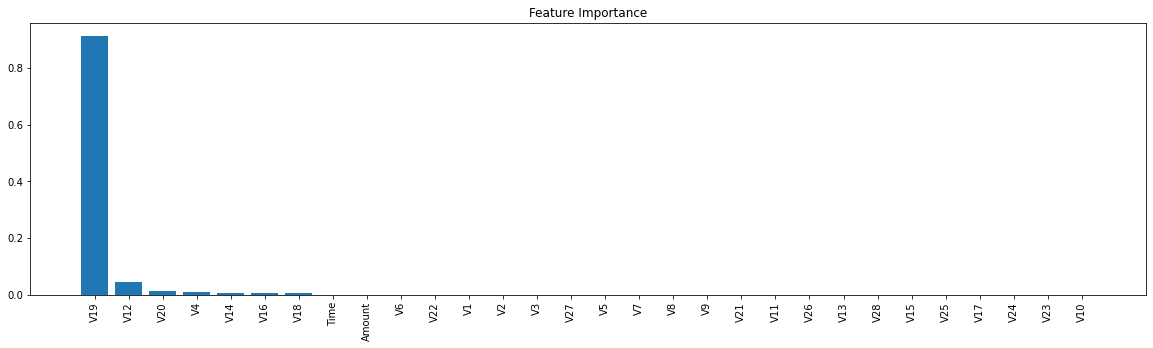

In [27]:
importances = model_ab_2.feature_importances_


index = np.argsort(importances)[::-1]
names = X_train.columns[index]

# Creamos el plot
plt.figure(figsize=(20,5))

# Creamos plot title
plt.title("Feature Importance")

# Agregamos las barras
plt.bar(range(X_train.shape[1]), importances[index])

# Agregamos los feature names 
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

# 🔍Predicting new values

In [28]:

# Droping unnecesary columns
X_test = X_test.drop(columns=['Unnamed: 0'], axis=1)


In [29]:
y_test_pred=model_ab_2.predict(X_test)

In [30]:
predictions = pd.DataFrame(y_test_pred)
predictions.columns = ['Y_Pred']

In [31]:
predictions.Y_Pred.value_counts()

0    3454
1     176
Name: Y_Pred, dtype: int64

In [32]:
predictions.to_csv('predictions_delivery.csv', index=False)

<img src='https://pbs.twimg.com/profile_images/2482738858/58igkd1cqnuc9sdqcgri_400x400.gif'>